![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [23]:
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
Day of Week             object
Hour OCC                 int64
dtype: object

In [28]:
crimes['Hour OCC'] = crimes['TIME OCC'].apply(lambda x: x[0:2]).astype(int)
hour = crimes['Hour OCC'].value_counts().idxmax()
peak_crime_hour = int(hour)
print(peak_crime_hour)

12


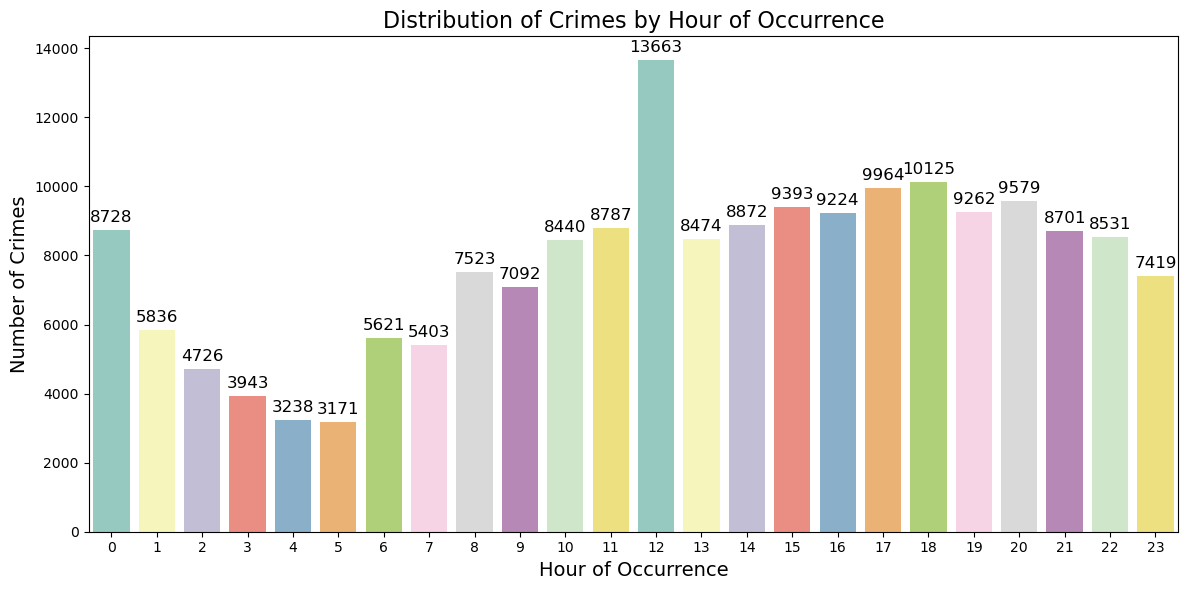

In [48]:
plt.figure(figsize=(12, 6)) 

# Create the countplot with seaborn
sns.countplot(data=crimes, x="Hour OCC", palette="Set3") 

plt.title('Distribution of Crimes by Hour of Occurrence', fontsize=16) 
plt.xlabel('Hour of Occurrence', fontsize=14)  
plt.ylabel('Number of Crimes', fontsize=14) 

# Adding counts above the bars
ax = plt.gca()  
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', 
                fontsize=12) 

plt.tight_layout()   
plt.show()

# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location

In [30]:
night_time = crimes[crimes["Hour OCC"].isin([22,23,0,1,2,3])]
peak_night_crime_location = night_time["AREA NAME"].value_counts().idxmax()
print(f"the area that has the largest frequency of night crimes is: {peak_night_crime_location}")

the area that has the largest frequency of night crimes is: Central


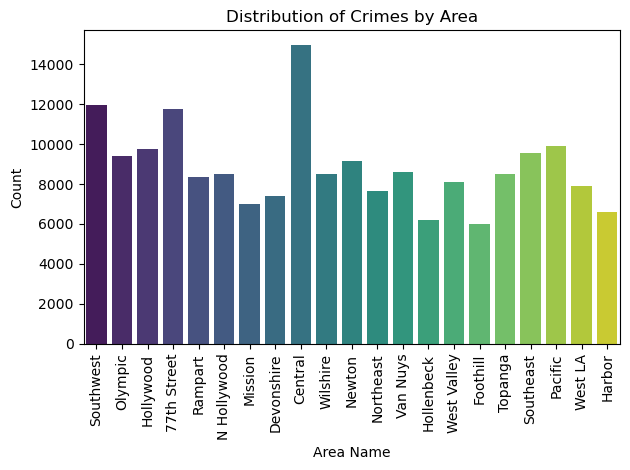

In [31]:
sns.countplot(data=crimes, x="AREA NAME", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Area Name")
plt.ylabel("Count")
plt.title("Distribution of Crimes by Area")
plt.tight_layout()
plt.show()

# Identify the number of crimes committed against victims of different age groups

Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [33]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

victim_ages = crimes["Age Bracket"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64

# Which Day of the week with the highest number of crimes?

In [34]:
# Add day of the week
crimes['Day of Week'] = crimes['DATE OCC'].dt.day_name()

day_of_week_crimes = crimes['Day of Week'].value_counts().idxmax()
day_of_week_crimes

'Friday'

# What is the Distribution of crimes by area?

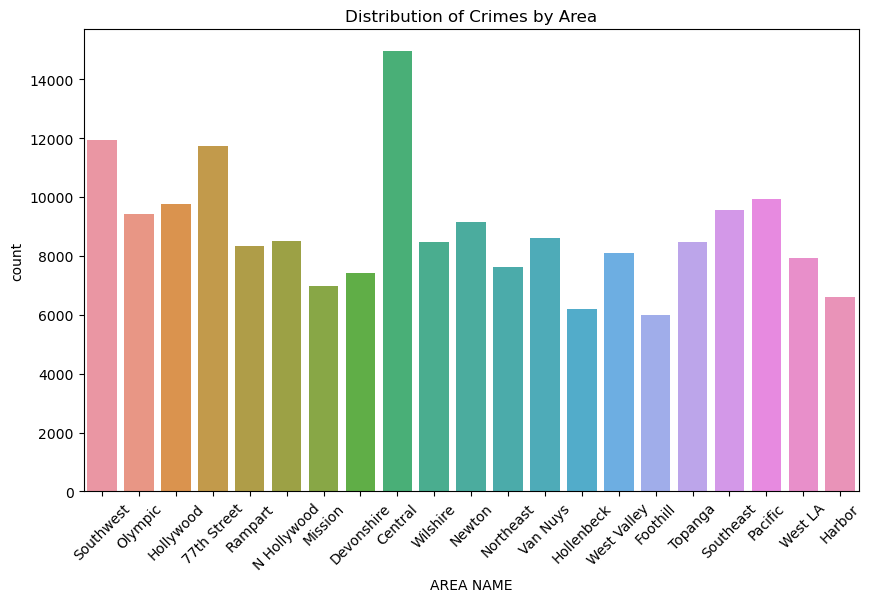

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=crimes, x='AREA NAME')
plt.title('Distribution of Crimes by Area')
plt.xticks(rotation=45)
plt.show()

# What is the Gender distribution of crime victims?

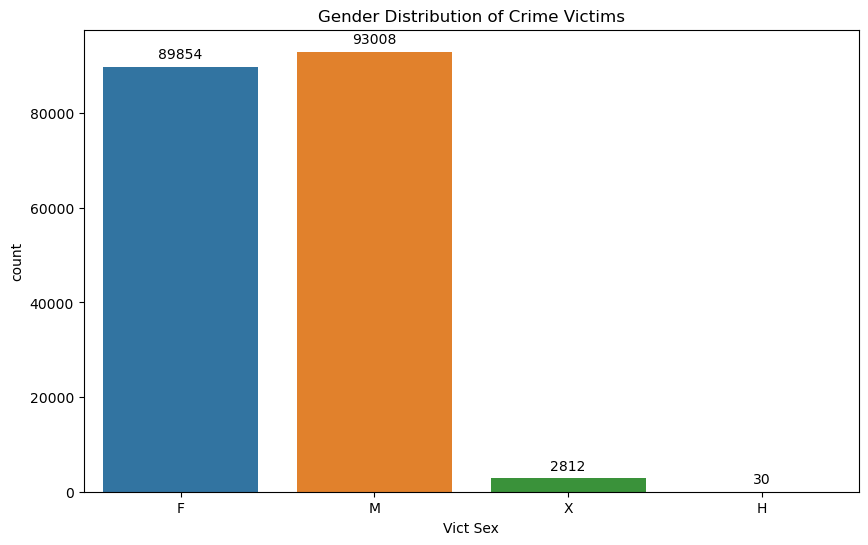

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=crimes, x='Vict Sex')

plt.title('Gender Distribution of Crime Victims')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

# what is the Age distribution of crime victims?

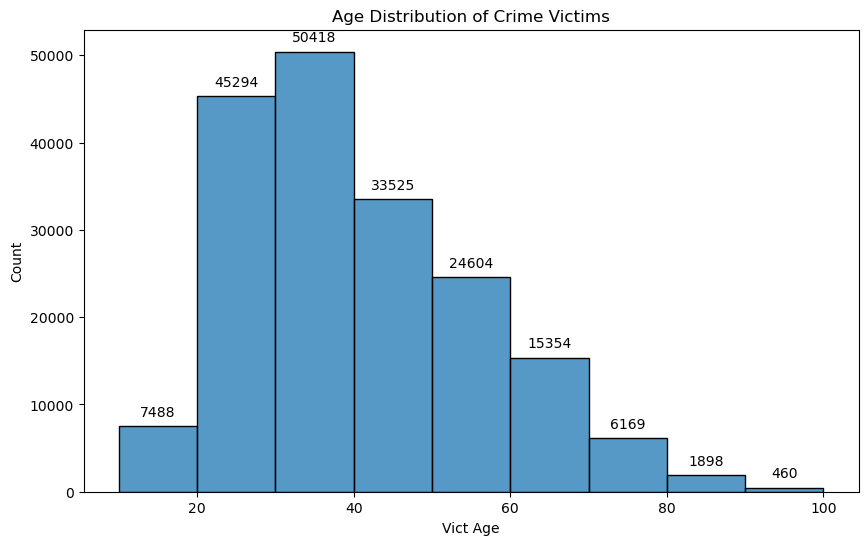

In [43]:
# Define the bin edges to cover the range from 10 to 100
bin_edges = range(10, 110, 10) 

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=crimes, x='Vict Age', bins=bin_edges)

plt.title('Age Distribution of Crime Victims')

# Adding counts above the bars
for p in ax.patches:
    if p.get_height() > 0:  # Ensure there are counts to display
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

plt.show()

# what is the Number of crimes committed each year?

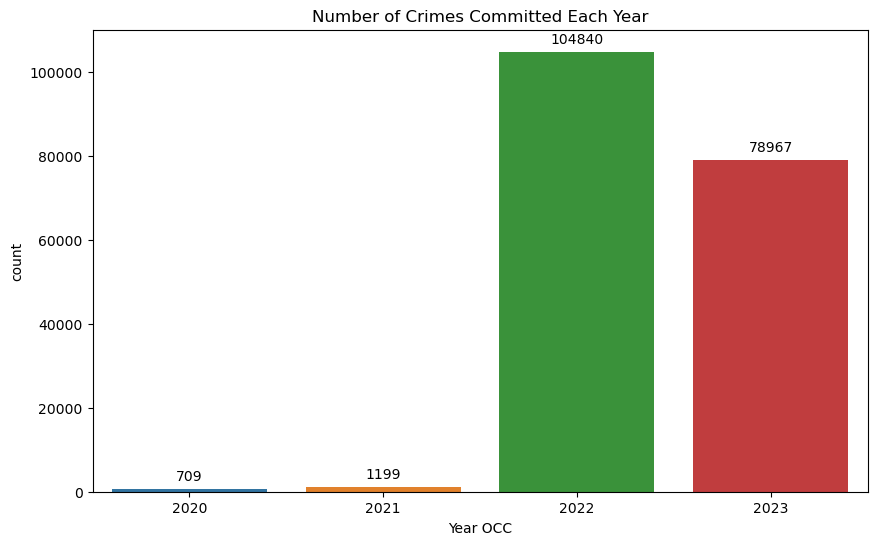

In [46]:
# extracte 'Year OCC' from 'DATE OCC' column
crimes['Year OCC'] = crimes['DATE OCC'].dt.year

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=crimes, x='Year OCC')

plt.title('Number of Crimes Committed Each Year')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()